<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#bike-sharing-in-San-Francisco" data-toc-modified-id="bike-sharing-in-San-Francisco-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>bike sharing in San Francisco</a></span><ul class="toc-item"><li><span><a href="#by-me" data-toc-modified-id="by-me-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>by me</a></span></li><li><span><a href="#Investigation-Overview" data-toc-modified-id="Investigation-Overview-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Investigation Overview</a></span></li><li><span><a href="#Dataset-Overview" data-toc-modified-id="Dataset-Overview-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dataset Overview</a></span></li><li><span><a href="#Distribution-of-customer-vs-subscriber" data-toc-modified-id="Distribution-of-customer-vs-subscriber-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Distribution of customer vs subscriber</a></span></li><li><span><a href="#Average-trip-duration-for-Customer-types" data-toc-modified-id="Average-trip-duration-for-Customer-types-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Average trip duration for Customer types</a></span></li><li><span><a href="#Average-trip-duration-for-every-week-day" data-toc-modified-id="Average-trip-duration-for-every-week-day-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Average trip duration for every week day</a></span></li><li><span><a href="#Total-renting-time-for-every-weekday" data-toc-modified-id="Total-renting-time-for-every-weekday-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Total renting time for every weekday</a></span></li><li><span><a href="#Amount-of-individual-bike-trips" data-toc-modified-id="Amount-of-individual-bike-trips-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Amount of individual bike trips</a></span></li><li><span><a href="#Bike-usage-per-hour-for-customer-type" data-toc-modified-id="Bike-usage-per-hour-for-customer-type-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Bike usage per hour for customer type</a></span></li></ul></li></ul></div>

# bike sharing in San Francisco
## by me

## Investigation Overview

In this slideshow I investigate the importance of different Customer types (subscriber and non-subscriber) for the bike sharing company.
Questions I want to address are how important are the tow groups in general, how long are the average and total usage durations, and when are people using the bikes and does it become apparent for which activity the bikes are used (work, school, free time)

## Dataset Overview

The dataset is comprised of almost 2.5 million individual bike trips in San Francisco for the year 2019. It holds a variety of information, but I am focussing here on the Customer type and the length of trips as well as the timing of these trips within a week and within a single day.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import platform

%matplotlib inline
#define a base color for mono color plots
base_color=sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.DataFrame()
df_temp = pd.read_csv("dataCompilation.csv",low_memory=False,float_precision='round_trip',parse_dates=['start_time',"end_time"])
df = df.append(df_temp)


In [3]:
df['weekday'] = df['weekday'].replace({0: 'Monday',1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

## Distribution of customer vs subscriber

Most people using the bike renting service subscribed to it, only 20 % pay every trip individually.

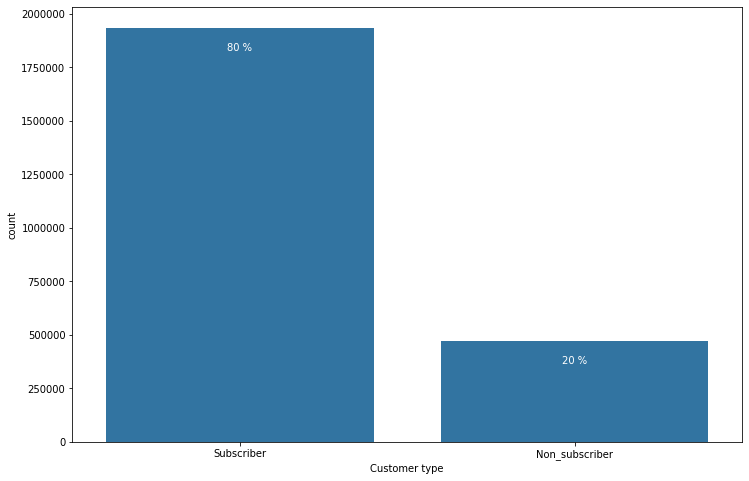

In [4]:
plt.figure(figsize=(12,8))
ax = sb.countplot(data= df, x="user_type",color = base_color);
plt.xlabel("Customer type")

Non_subscriber = (df["user_type"]=="Non_subscriber").sum()*100
Subscriber = (df["user_type"]=="Subscriber").sum()*100
tot = Non_subscriber+Subscriber


for p in ax.patches:
    ax.annotate(format(int(p.get_height())/tot*10000 ,'.0f')+" %", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points',color ="white")


## Average trip duration for Customer types

Non Subscriber use the bikes on average twice as long as Subscribers.

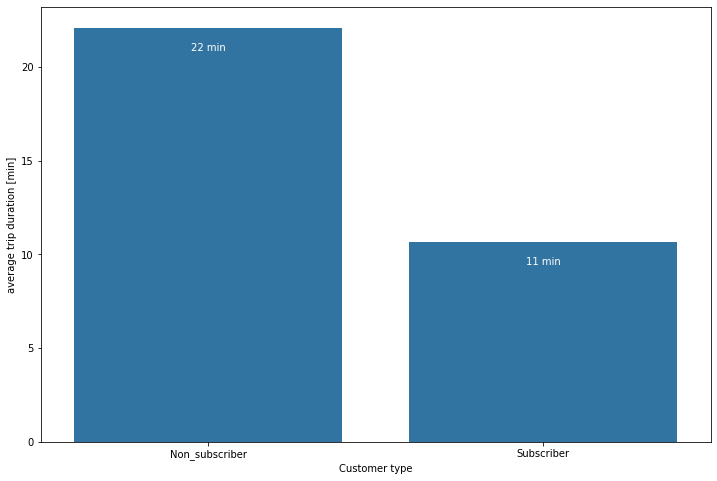

In [5]:
plt.figure(figsize=(12,8))
df2 = pd.DataFrame( df.groupby("user_type")[["duration_min"]].mean())
ax = sb.barplot(data=df2,x= df2.index,y="duration_min",color=base_color);
plt.ylabel("average trip duration [min]");
plt.xlabel("Customer type");
for p in ax.patches:
    ax.annotate(format(p.get_height() ,'.0f')+" min", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points',color ="white")

## Average trip duration for every week day

For both customer types the average trip duration increase at the weekend. But it increases more for Non-Subscriber (1.4 times) than for Subscribers (1.2 times)


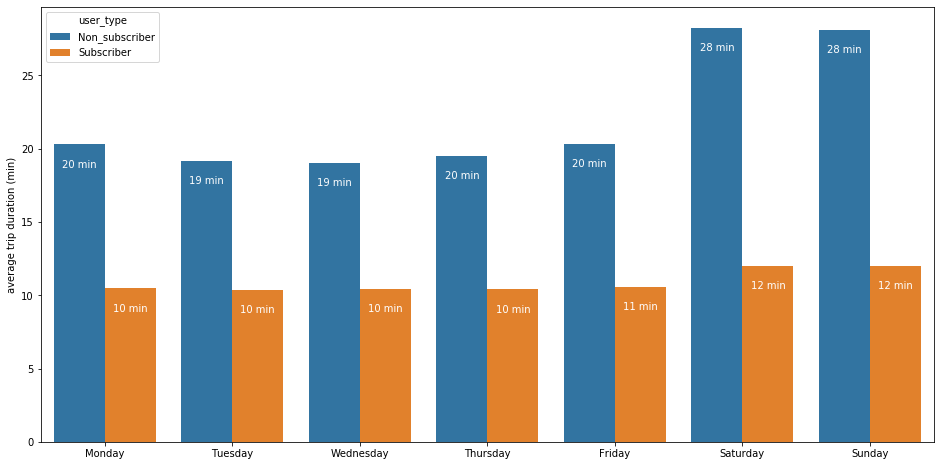

In [6]:
df7 = pd.DataFrame( df.groupby(["weekday","user_type"])["duration_min"].mean())
df7["temp"] = df7.index
df7["weekday"] = [x[0] for x in df7["temp"]]
df7["user_type"] = [x[1] for x in df7["temp"]]
df7 = df7.drop("temp", axis =1)


plt.figure(figsize=(16,8)) 
ax = sb.barplot(x="weekday", y="duration_min", hue="user_type", data=df7,order=['Monday',"Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.ylabel("average trip duration (min)");
plt.xlabel("");
for p in ax.patches:
    ax.annotate(format(p.get_height() ,'.0f')+" min", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points',color ="white")

## Total renting time for every weekday

The amount of time all bikes were rented per weekday for Customer types. 

Within the workweek subscribers are the most important group for renting bikes, but on the weekend both subscriber and non-subscriber are similar important for the bike sharing company.

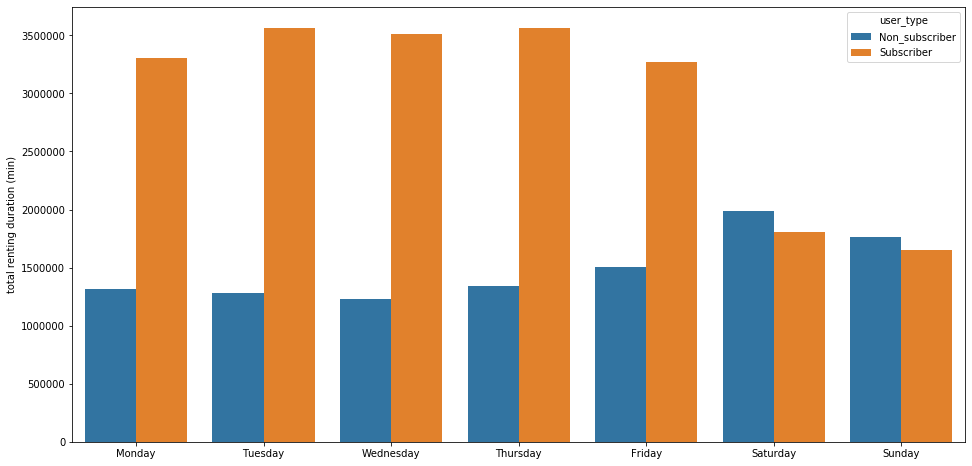

In [7]:
df8 = pd.DataFrame( df.groupby(["weekday","user_type"])["duration_min"].sum())
df8["temp"] = df8.index
df8["weekday"] = [x[0] for x in df8["temp"]]
df8["user_type"] = [x[1] for x in df8["temp"]]
df8 = df8.drop("temp", axis =1)
plt.figure(figsize=(16,8)) 
ax = sb.barplot(x="weekday", y="duration_min", hue="user_type", data=df8,order=['Monday',"Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.ylabel("total renting duration (min)");
plt.xlabel("");


## Amount of individual bike trips

Subscriber are using the bikes substantially more within the workweek compared to the weekend, while non-subcriber have the same amount of bike trips on weekdays and on the weekend.

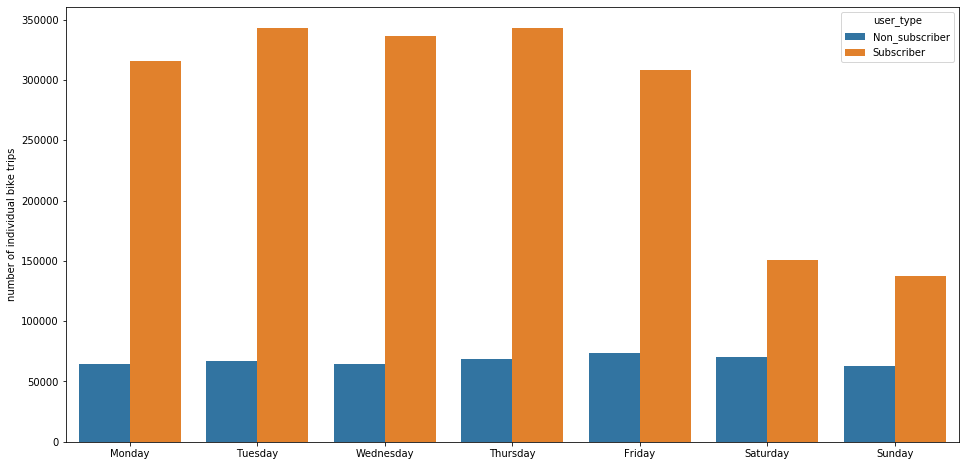

In [8]:
plt.figure(figsize=(16,8)) 
df = df.sort_values("user_type")
ax = sb.countplot(x="weekday",  hue="user_type", data=df,order=['Monday',"Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.ylabel("number of individual bike trips");
plt.xlabel("");



## Bike usage per hour for customer type

Looking at the time of the day when bikes are rented shows that subscriber and non-subscriber show the same pattern of usage, but in a different scale. Both Customer types are using the bikes between 8 and 9 in the morning and between 4 and 5 in the afternoon.

This suggests the bikes are preferential used for the way to work or school.

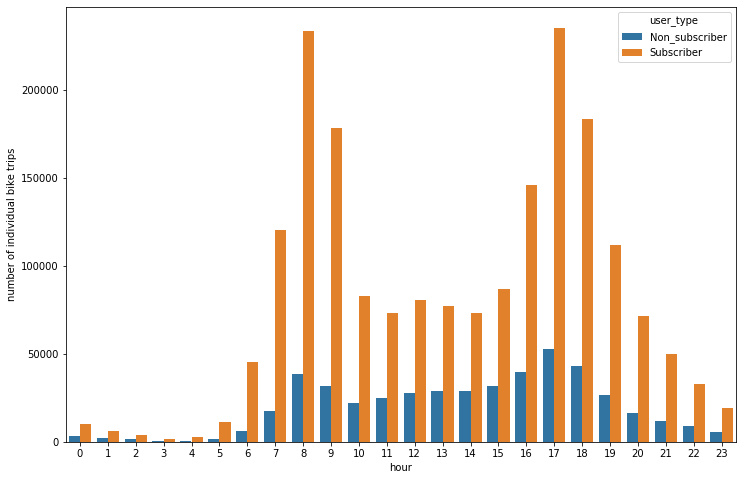

In [9]:
plt.figure(figsize=(12,8))
sb.countplot(data= df, x="hour",hue= "user_type");
plt.ylabel("number of individual bike trips");